# **Build Classification Models**
* The dataset has 5820 observations that represent each student 
* The dataset has 31 features: 
    * 'instr', 'class': the course atributes
    * 'nb.repeat', 'attendance', 'difficulty': The student's attitude
    * 'Q1' through 'Q12': Questioneers about the course 
    * 'Q13' through 'Q28': Questioneers about the instructor 
* The dataset contains 1843 rows that have the same values across all features
* Since the dataset doesn't have an ID columns, it's difficult to determine whether those 1843 rows are duplicates or not, thus we try dataset with and without the duplicates
* All features are categorical variables
* converted and scaled features
* Four datasets (with duplicates & Non-scaling, with duplicates & scaled, without duplicates & Non-scaling, without duplicates & scaled) were used

* Use 'Q11' and 'nb.repeat' as target variables "The course was relevant and beneficial to my professional development."

### **Import Modules**

In [1]:
#### Import the libraries needed
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# import chart_studio.plotly as py
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold', 
                     'xtick.labelcolor':"#333333", 'ytick.labelcolor':"#333333"})
plt.rcParams["font.weight"] = "bold"

### **Load Dataset**
* https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-1-data_collection-preprocessing/turkiye-student-evaluation_generic.csv

In [4]:
#path = Path.cwd()
df = pd.read_csv("data/turkiye-student-evaluation_generic.csv")

In [5]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
df.shape

(5820, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [8]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Use 'Q11' and 'nb.repeat' as a target variable
* Interpret the score 4 (Agree) and 5 (Strongly Agree)  to 1, 1, 2, and 3 to 0 and create a variable 'Q11_binary'
* Interpret 1 to 1, and 2 and 3 to 0, and create a variable 'nb.repeat_binary'
* Combine 'Q11_binary' and 'nb.repeat_binary' and create 'nb.repeat_Q11_binary'
* If both 'Q11_binary' and 'nb.repeat_binary' are 1 --> 1, otherwise --> 0

In [9]:
# Use 'Q11' as a target variable 
# Check the frequency and ratio of each value in nb.repeat
num = df['Q11'].value_counts().to_list()
ratio = df['Q11'].value_counts(normalize=True).to_list()

print("Q11:\tFequency     Ratio(%)")
for i in range(5):
    print(f"{i+1:>3}:{num[i]:>12}{ratio[i]*100:>12.2f}")

Q11:	Fequency     Ratio(%)
  1:        1660       28.52
  2:        1548       26.60
  3:        1017       17.47
  4:         917       15.76
  5:         678       11.65


#### Use 'nb.repeat' as a target variable

In [10]:
# Use 'nb.repeat' as a target variable 
# Check the unique value in a target variable, 'np.repeat'
print(f"Unique Values in'nb.repeat': {df['nb.repeat'].unique()}")

Unique Values in'nb.repeat': [1 3 2]


In [11]:
# Check the frequency and ratio of each value in nb.repeat
num = df['nb.repeat'].value_counts().to_list()
ratio = df['nb.repeat'].value_counts(normalize=True).to_list()

print("Num of Repeat:\tFequency     Ratio(%)")
for i in range(3):
    print(f"{i+1:>13}:{num[i]:>10}{ratio[i]*100:>12.2f}")

Num of Repeat:	Fequency     Ratio(%)
            1:      4909       84.35
            2:       576        9.90
            3:       335        5.76


In [12]:
# Map 'nb.repeat' as a target variable 
df['nb.repeat_binary'] = [1 if val ==1 else 0 for val in df['nb.repeat']]
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat_binary
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
# Map  'nb.repeat' as a target variable 
df['Q11_binary'] = [1 if val==4 or val==5  else 0 for val in df['Q11']]
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat_binary,Q11_binary
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


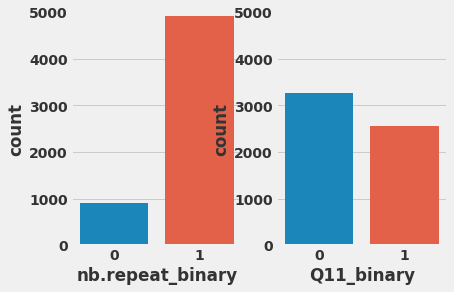

In [14]:
# Check frequency of 'nb.repeat_binary' and 'Q11_binary'
plt.subplot(1, 2, 1)
bar1 = sns.countplot('nb.repeat_binary', data=df)
bar1.set_ylim(0, 5000)
plt.subplot(1, 2, 2)
bar2 = sns.countplot('Q11_binary', data=df)
bar2.set_ylim(0, 5000);

In [15]:
# Create a new column by logical adding 'nb.repeat_binary' and 'Q11_binary'
combinations = list(zip(df['nb.repeat_binary'], df['Q11_binary']))
df['nb.repeat_Q11_binary'] = [1 if combination[0]==1 and combination[1]==1 else 0 for combination in combinations]
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat_binary,Q11_binary,nb.repeat_Q11_binary
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0,0
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0,0
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,1,1
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0,0
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


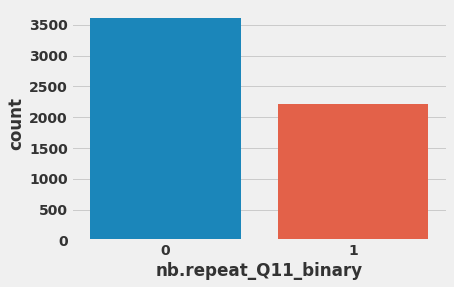

In [16]:
sns.countplot(df['nb.repeat_Q11_binary']);

### Create base models with duplicates and without duplicates

In [84]:
# Import modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report
from statsmodels.discrete.discrete_model import MNLogit
import xgboost as xgb

import shap
shap.initjs()

### Prepare the train and test datasets
* We prepare 4 datasets
    * Datasets with and without duplicates + non-scaling
    * Datasets with and without duplicates + scaling

In [18]:
# Check duplicates
duplicates = df.duplicated()
print(f"df has {duplicates.sum()} duplicates")

# df with duplicates
df_w_duplicates = df.copy()
# df without duplicates
df_wo_duplicates = df[~duplicates]

df has 1843 duplicates


#### Dataset with Duplicates

In [19]:
# Dataset with duplicates and 'nb.repeat_Q11' as a target variable
y_w_duplicates = df_w_duplicates['nb.repeat_Q11_binary']
X_w_duplicates = df_w_duplicates.drop(['nb.repeat', 'Q11', 'nb.repeat_binary', 'Q11_binary', 'nb.repeat_Q11_binary'], axis=1)

In [20]:
# Scale the datasets
ss = StandardScaler()
X_w_duplicates_scaled = ss.fit_transform(X_w_duplicates)

In [21]:
# With duplicates & non-scaling
X_train_w_dup_no_scale, X_test_w_dup_no_scale, y_train_w_dup, y_test_w_dup = train_test_split(X_w_duplicates, y_w_duplicates, random_state=327, stratify=df_w_duplicates['nb.repeat_Q11_binary'])

In [22]:
# Check the shape of train and test datasets
print("--- With duplicates & Non-scaling ---")
print(f"Shape of train dataset: {X_train_w_dup_no_scale.shape}")
print(f"Shape of train target variable: {y_train_w_dup.shape}")
print(f"Shape of test dataset: {X_test_w_dup_no_scale.shape}")
print(f"Shape of test target variable: {y_test_w_dup.shape}")

--- With duplicates & Non-scaling ---
Shape of train dataset: (4365, 31)
Shape of train target variable: (4365,)
Shape of test dataset: (1455, 31)
Shape of test target variable: (1455,)


In [23]:
# With duplicates & scaled
X_train_w_dup_w_scale, X_test_w_dup_w_scale, y_train_w_dup, y_test_w_dup = train_test_split(X_w_duplicates_scaled, y_w_duplicates, random_state=327, stratify=df_w_duplicates['nb.repeat_Q11_binary'])

In [24]:
# Check the shape of train and test datasets
print("--- With duplicates & scaled ---")
print(f"Shape of train dataset: {X_train_w_dup_w_scale.shape}")
print(f"Shape of train target variable: {y_train_w_dup.shape}")
print(f"Shape of test dataset: {X_test_w_dup_w_scale.shape}")
print(f"Shape of test target variable: {y_test_w_dup.shape}")

--- With duplicates & scaled ---
Shape of train dataset: (4365, 31)
Shape of train target variable: (4365,)
Shape of test dataset: (1455, 31)
Shape of test target variable: (1455,)


#### Dataset without Duplicates

In [25]:
# Dataset without duplicates and 'nb.repeat_Q11' as a target variable
y_wo_duplicates = df_wo_duplicates['nb.repeat_Q11_binary']
X_wo_duplicates = df_wo_duplicates.drop(['nb.repeat', 'Q11', 'nb.repeat_binary', 'Q11_binary', 'nb.repeat_Q11_binary'], axis=1)

In [26]:
# Scale the datasets
ss = StandardScaler()
X_wo_duplicates_scaled = ss.fit_transform(X_wo_duplicates)

In [27]:
# Without duplicates & non-scaling
X_train_wo_dup_no_scale, X_test_wo_dup_no_scale, y_train_wo_dup, y_test_wo_dup = train_test_split(X_wo_duplicates, y_wo_duplicates, random_state=327, stratify=df_wo_duplicates['nb.repeat_Q11_binary'])

In [28]:
# Check the shape of train and test datasets
print("--- Without duplicates & Non-scaling ---")
print(f"Shape of train dataset: {X_train_wo_dup_no_scale.shape}")
print(f"Shape of train target variable: {y_train_wo_dup.shape}")
print(f"Shape of test dataset: {X_test_wo_dup_no_scale.shape}")
print(f"Shape of test target variable: {y_test_wo_dup.shape}")

--- Without duplicates & Non-scaling ---
Shape of train dataset: (2982, 31)
Shape of train target variable: (2982,)
Shape of test dataset: (995, 31)
Shape of test target variable: (995,)


In [29]:
# Without duplicates & scaled
X_train_wo_dup_w_scale, X_test_wo_dup_w_scale, y_train_wo_dup, y_test_wo_dup = train_test_split(X_wo_duplicates_scaled, y_wo_duplicates, random_state=327, stratify=df_wo_duplicates['nb.repeat_Q11_binary'])

In [30]:
# Check the shape of train and test datasets
print("--- Without duplicates & Non-scaling ---")
print(f"Shape of train dataset: {X_train_wo_dup_w_scale.shape}")
print(f"Shape of train target variable: {y_train_wo_dup.shape}")
print(f"Shape of test dataset: {X_test_wo_dup_w_scale.shape}")
print(f"Shape of test target variable: {y_test_wo_dup.shape}")

--- Without duplicates & Non-scaling ---
Shape of train dataset: (2982, 31)
Shape of train target variable: (2982,)
Shape of test dataset: (995, 31)
Shape of test target variable: (995,)


In [31]:
# Prepare datasets
datasets = ["With Duplicates & Non Scaling", "With Duplicates & Scaled", "Without Duplicates & Non Scaling", "Without Duplicates & Scaled"] 
X_train_list = [X_train_w_dup_no_scale, X_train_w_dup_w_scale, X_train_wo_dup_no_scale, X_train_wo_dup_w_scale]
X_test_list = [X_test_w_dup_no_scale, X_test_w_dup_w_scale, X_test_wo_dup_no_scale, X_test_wo_dup_w_scale]
y_train_list = [y_train_w_dup, y_train_wo_dup]
y_test_list = [y_test_w_dup, y_test_wo_dup]

## **Build Models**
* Build LogisticRegression, MNLogit, RandomForestClassifier, XGBClassifier

In [32]:
# Function to fit and evaluate a model
def evaluate_model(classification_model, X_train, X_test, y_train, y_test):
    performance = {}

    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)

    # Accuracy Rate
    accuracy = accuracy_score(y_test, y_pred)
    # Precision
    precision = precision_score(y_test, y_pred)
    # Recall
    recall = recall_score(y_test, y_pred)
    fscore = 2 * (precision * recall) / (precision + recall)
    # FPR and TPR
    y_pred_proba = classification_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # AUC Score
    auc = roc_auc_score(y_test, y_pred)
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    performance = {"model": type(classification_model).__name__, 
                   "accuracy": accuracy, 
                   "precision": precision, 
                   "recall": recall, 
                   "F1 score": fscore, 
                   "FPR": fpr, 
                   "TPR": tpr, 
                   "AUC Score": auc, 
                   "Confusion Matrix": cm}
    return performance

# Function to draw ROC Curve plot  
def draw_roc_curve(fpr, tpr, auc, ax):
    ax.plot(fpr, tpr, lw=2.0) 
    plt.text(x=0.5, y=0, s=f"AUC: {auc:.3f}", fontsize=12)
    plt.plot([0, 1], [0, 1], ls='--', lw=1.0, color='r');

In [33]:
# Create LogisticRegression, CategoricalNB, RandomForestClassifier, and XGBClassifier models
models = [LogisticRegression(), CategoricalNB(), RandomForestClassifier(), xgb.XGBClassifier()]
evaluation_metrics = []

for model in models:
    for i in range(len(y_train_list)):
        if i == 0:
            j = 0
        else:
            j = 2
        for j in range(j, j + 2):
            if (type(model).__name__ == "CategoricalNB") & (j % 2 == 1) :
                break
            X_train, y_train, X_test, y_test = X_train_list[j], y_train_list[i], X_test_list[j], y_test_list[i]
            performance = evaluate_model(model, X_train, X_test, y_train, y_test)
            evaluation_metrics.append(performance)   

## **Evaluate Models**
* The base models of RandomForestClassifier and XGBoostClassifier showed high performance among 14 combination of model and dataset
* The datasets with duplicates led the better performance
* Scaling doesn't affect the performance except for RandomForestClassifier.

* XGBoostClassifier showed the highest AUC of 0.881 and F1 score of 0.849 with the datasets with duplicates
* RandomForestClassifier showed the second highest AUC and F1 score of 0.877 and 0.846	

* We bring RandomForestClassifier and XGBoostClassifier to the hyperparameter tuning phase along with the datasets with duplicates 

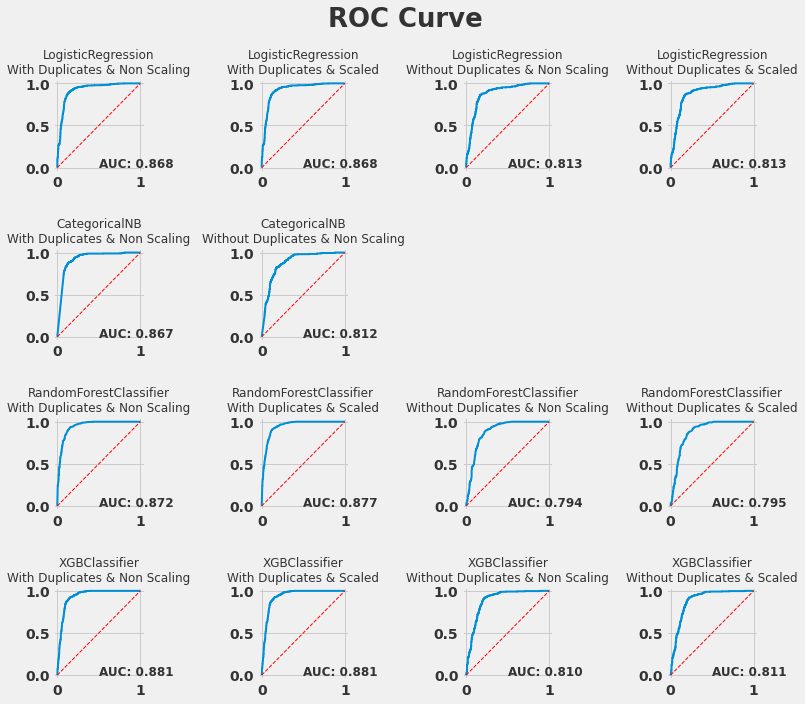

In [34]:
# Draw Roc Curve
dataset_used = []
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle("ROC Curve", fontsize=26, weight='bold')
i = 0
c = 4
prev_model = "" 
for dic in evaluation_metrics:
    if (dic['model'] == "CategoricalNB") & (i%c == 1):
        title = dic['model'] + "\n" + datasets[i%c + 1]
        dataset_used.append(datasets[i%c + 1])
    else:
        title = dic['model'] + "\n" + datasets[i%c]
        dataset_used.append(datasets[i%c])
    fpr = dic['FPR'] 
    tpr = dic['TPR']
    auc = dic['AUC Score']

    ax = plt.subplot(4, 4, i+1)
    plt.title(title, fontsize=12)
    draw_roc_curve(fpr, tpr, auc, ax)
    plt.tight_layout(h_pad=2.0, w_pad=4.0);
    
    if (prev_model == "CategoricalNB") & (prev_model == dic['model']):
        i += 3
    else:
        i += 1
    prev_model = dic['model'] 

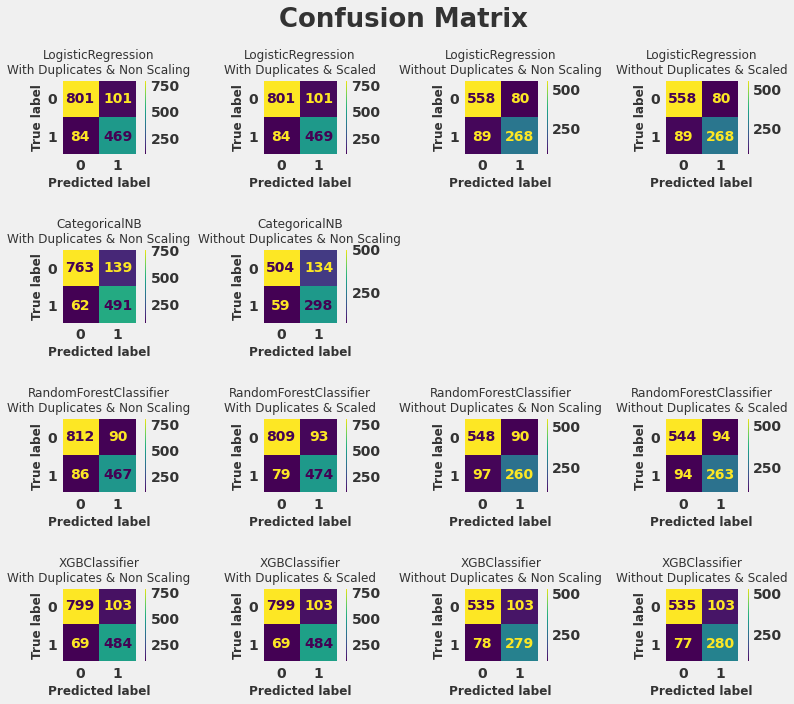

In [35]:
# Draw Confusion Matrix
fig, ax = plt.subplots(figsize=(11, 10))
plt.rcParams['axes.labelsize'] = '12'
plt.suptitle("Confusion Matrix", fontsize=26, weight='bold')
i = 0
c = 4
prev_model = ""
for dic in evaluation_metrics:
    
    if (dic['model'] == "CategoricalNB") & (i%c == 1):
        title = dic['model'] + "\n" + datasets[i%c + 1]
    else:
        title = dic['model'] + "\n" + datasets[i%c]
    cm = dic['Confusion Matrix']

    ax = plt.subplot(4, 4, i+1)
    ax.set_title(title, fontsize=12) 
    ConfusionMatrixDisplay(cm).plot(ax=ax)
    plt.tight_layout(h_pad=2.0, w_pad=3.0)
    ax.grid(False);

    if (prev_model == "CategoricalNB") & (prev_model == dic['model']) :
        i += 3
    else: 
        i += 1
        
    prev_model = dic['model']

In [36]:
# View evaluation matrics
df_performance = pd.DataFrame(evaluation_metrics)
df_performance.drop(['FPR', 'TPR', 'Confusion Matrix'], axis=1, inplace=True)
df_performance['dataset_used'] = dataset_used
df_performance

,model,accuracy,precision,recall,F1 score,AUC Score,dataset_used
0,LogisticRegression,0.872852,0.822807,0.848101,0.835263,0.868064,With Duplicates & Non Scaling
1,LogisticRegression,0.872852,0.822807,0.848101,0.835263,0.868064,With Duplicates & Scaled
2,LogisticRegression,0.830151,0.770115,0.750700,0.760284,0.812654,Without Duplicates & Non Scaling
3,LogisticRegression,0.830151,0.770115,0.750700,0.760284,0.812654,Without Duplicates & Scaled
4,CategoricalNB,0.861856,0.779365,0.887884,0.830093,0.866891,With Duplicates & Non Scaling
5,CategoricalNB,0.806030,0.689815,0.834734,0.755387,0.812351,Without Duplicates & Non Scaling
6,RandomForestClassifier,0.879038,0.838420,0.844485,0.841441,0.872353,With Duplicates & Non Scaling
7,RandomForestClassifier,0.881787,0.835979,0.857143,0.846429,0.877019,With Duplicates & Scaled
8,RandomForestClassifier,0.812060,0.742857,0.728291,0.735502,0.793613,Without Duplicates & Non Scaling
9,RandomForestClassifier,0.811055,0.736695,0.736695,0.736695,0.794680,Without Duplicates & Scaled


In [37]:
# Max AUC Score
max_auc = df_performance['AUC Score'].max()
max_auc_model = df_performance['model'][df_performance['AUC Score'] == max_auc]
max_auc_dataset = df_performance['dataset_used'][df_performance['AUC Score'] == max_auc]
max_auc_df = pd.DataFrame({"model": max_auc_model, "dataset_used": max_auc_dataset})
max_auc_df['max_auc'] = max_auc
max_auc_df

,model,dataset_used,max_auc
10,XGBClassifier,With Duplicates & Non Scaling,0.880518
11,XGBClassifier,With Duplicates & Scaled,0.880518


In [38]:
# Max Accuracy 
max_accuracy = df_performance['accuracy'].max()
max_accuracy_model = df_performance['model'][df_performance['accuracy'] == max_accuracy]
max_accuracy_dataset = df_performance['dataset_used'][df_performance['accuracy'] == max_accuracy]
max_accuracy_df = pd.DataFrame({"model": max_accuracy_model, "dataset_used": max_accuracy_dataset})
max_accuracy_df['max_accuracy'] = max_accuracy
max_accuracy_df

,model,dataset_used,max_accuracy
7,RandomForestClassifier,With Duplicates & Scaled,0.881787
10,XGBClassifier,With Duplicates & Non Scaling,0.881787
11,XGBClassifier,With Duplicates & Scaled,0.881787


In [39]:
# Max F1 Score
max_f1 = df_performance['F1 score'].max()
max_f1_model = df_performance['model'][df_performance['F1 score'] == max_f1]
max_f1_dataset = df_performance['dataset_used'][df_performance['F1 score'] == max_f1]
max_f1_df = pd.DataFrame({"model": max_f1_model, "dataset_used": max_f1_dataset})
max_f1_df['max_f1'] = max_f1
max_f1_df

,model,dataset_used,max_f1
10,XGBClassifier,With Duplicates & Non Scaling,0.849123
11,XGBClassifier,With Duplicates & Scaled,0.849123


## **Hyperparameter Tuning**  
* RandomForestClassifier and XGBClassifier that showed better performance were selected  
* Two datasets that have duplicates with non-scaling and duplicates with scaling were used  
</p> 

* Whether scaling data or not doesn't make difference in the performance
* Sets of hyperparameters that have the best score for each model are as follows:
    |Model|**RandomForestClassifier**|
    |-|-|
    |Hyperparameters|{'n_estimators': 200, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}|
    |Best score|0.877434135166094|
    |||
    |Model|**XGBClassifier**|
    |Hyperparameters|{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'eval_metric': 'auc'}|
    |Best score|0.8769759450171822|  
</p>   

 
* In both RandomForestClassifier and XGBClasifier models, 'Q12': The course helped me look at life and the world with a new perspective has the highet feature importance value followed by 'Q10' and 'Q9'
* In the XGBClassifier models, 'Q3', 'Q17' and 'Q21' have higher feature importances


In [40]:
# Create sets of parameters for RandomForestClassifier and XGBClassifier
datasets_w_dup = datasets[:2]
X_train_list_w_dup = X_train_list[:2]
X_test_list_w_dup = X_test_list[:2]
y_train_list_w_dup = y_train_list[0]
y_test_list_w_dup = y_test_list[0]

In [41]:
# Set up hyperparameters for RandomFOorestClassifier
rfc_params = dict(
    n_estimators=[50, 100, 150, 200], # Default: 100
    max_features=[None, 'sqrt', 0.8], # Default: None
    criterion=['gini', 'entropy', 'log_loss'], # Default: gini
    max_depth=[n for n in range(5,11)] # Default: None
    # oob_score=True, # Default: False
)

# Build RandomForestClassifier, and XGBClassifier models
rfc = RandomForestClassifier(random_state=327)
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv= 5) 

In [42]:
# Set up hyperparameters for XGBoostClassifier
xgbc_params = dict(
    n_estimators=[50, 100, 150, 200], # Default: 100
    max_depth=[n for n in range(5,11)], # Default: None
    learning_rate=[0.01, 0.05, 0.1], # Default: None
    eval_metric=['auc'] # Default: None
)

# Build XGBClassifier models
xgbc = xgb.XGBClassifier(random_state=327)
rs_xgbc = RandomizedSearchCV(estimator=xgbc, param_distributions=xgbc_params, cv= 5) 

In [43]:
# Build RandomForestClassifier, and XGBClassifier models
models = [rs_rfc, rs_xgbc]
evaluation_metrics = []

fitted_models = []
for model in models:
    for i in range(len(X_train_list_w_dup)):
            X_train, X_test = X_train_list[i], X_test_list[i]
            y_train, y_test = y_train_list_w_dup, y_test_list_w_dup
            fitted_models.append(model.fit(X_train, y_train))
            performance = evaluate_model(model, X_train, X_test, y_train, y_test)
            evaluation_metrics.append(performance)   

In [70]:
# Check the best parameters for each model and dataset combinations
importances = []
models = []
for i in range(len(fitted_models)):
    print("Model: ", type(fitted_models[i].best_estimator_).__name__)
    print("Parameters used: ", fitted_models[i].best_params_)
    print("Best score", fitted_models[i].best_score_)
    print()
    models.append(type(fitted_models[i].best_estimator_).__name__)
    importances.append(fitted_models[i].best_estimator_.feature_importances_)

Model:  RandomForestClassifier
Parameters used:  {'n_estimators': 200, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best score 0.877434135166094

Model:  RandomForestClassifier
Parameters used:  {'n_estimators': 200, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best score 0.877434135166094

Model:  XGBClassifier
Parameters used:  {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'eval_metric': 'auc'}
Best score 0.8769759450171822

Model:  XGBClassifier
Parameters used:  {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'eval_metric': 'auc'}
Best score 0.8769759450171822



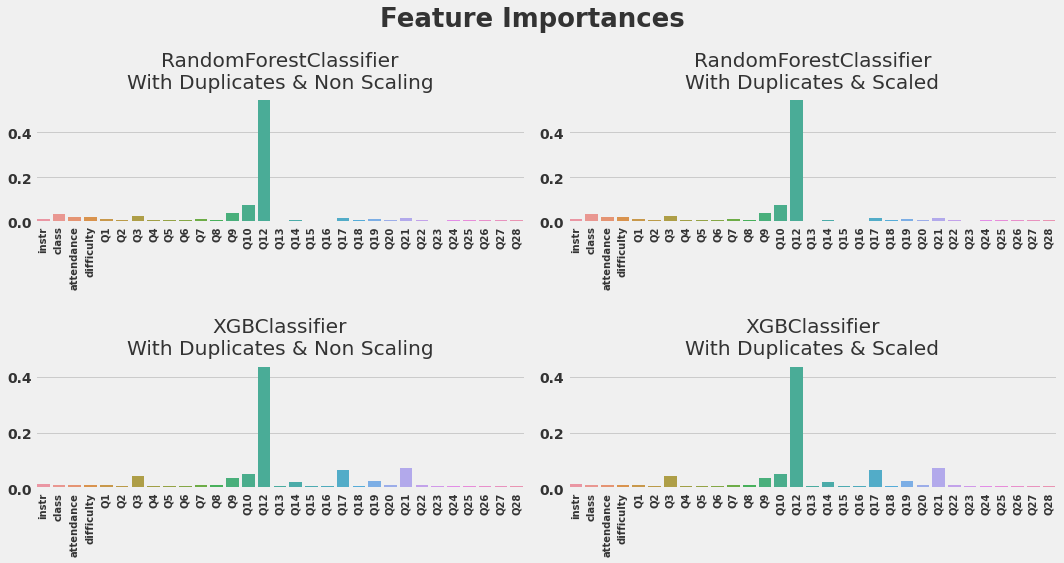

In [83]:
# Check feature importances
features = X_train_list[0].columns

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Feature Importances", fontsize=26, weight='bold')
for i in range(len(importances)):
    ax = plt.subplot(2, 2, i+1)
    plt.title(f"{models[i]}\n{datasets[i%2]}")
    sns.barplot(features, importances[i], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10)
    fig.tight_layout(h_pad=2.0)

## **Evaluate Models**
* Compare 2 models: RandomForestClassifier and XGBClassifier models with the best hyperparameters
* RandomForestClassifier outperforms:  

|accuracy|precision|recall|F1 score|AUC|
|-|-|-|-|-|
|0.883849|0.829897|0.873418|0.851101|0.881831|

In [45]:
# Create RandomForestClassifier model with the best parameters
rfc_model = RandomForestClassifier(n_estimators=150, 
                                   max_features=None, 
                                   max_depth=10, 
                                   criterion='entropy', 
                                   random_state=327)

X_train, X_test, y_train, y_test = X_train_list[0], X_test_list[0], y_train_list[0], y_test_list[0]

In [46]:
# View the evaluation metrics
result_rfc = evaluate_model(rfc_model, X_train, X_test, y_train, y_test)

rfc_fpr = result_rfc['FPR']
rfc_tpr = result_rfc['TPR']
rfc_auc = result_rfc['AUC Score']
rfc_cm =  result_rfc['Confusion Matrix']

del result_rfc['FPR']
del result_rfc['TPR']
del result_rfc['Confusion Matrix']

rfc_result_df = pd.DataFrame(result_rfc, index=[0])

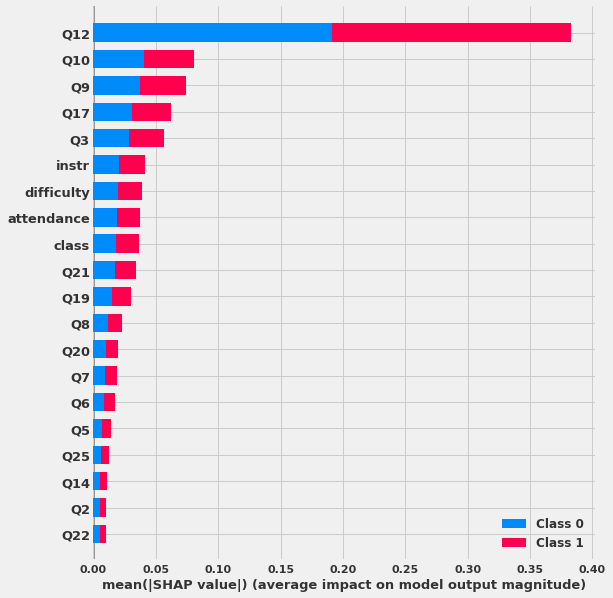

In [98]:
explainer_rfc = shap.Explainer(rfc_model)
shap_values_rfc = explainer_rfc.shap_values(X_test)
shap.summary_plot(shap_values_rfc, X_test)

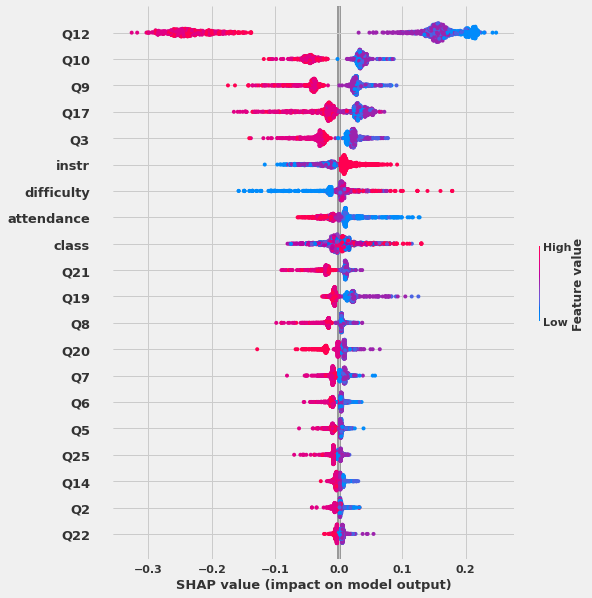

In [87]:
shap.summary_plot(shap_values_rfc[0], X_test)

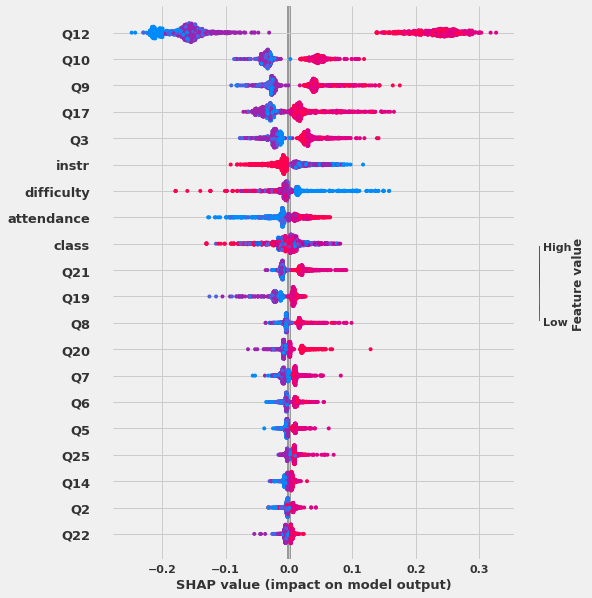

In [88]:
shap.summary_plot(shap_values_rfc[1], X_test)

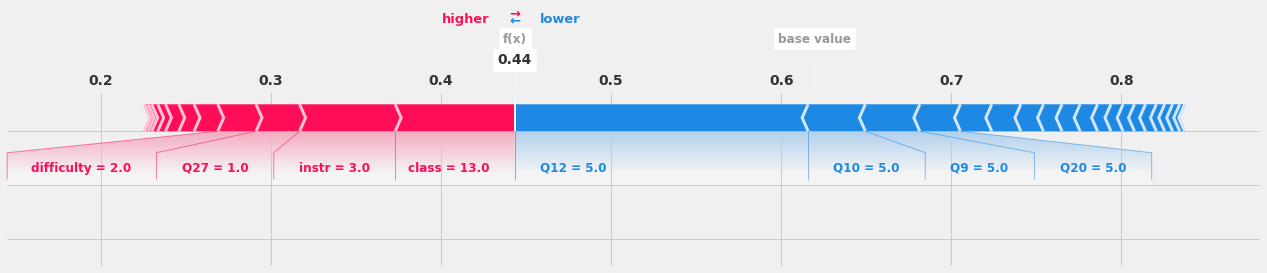

In [89]:
shap.plots.force(explainer_rfc.expected_value[0], shap_values_rfc[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [47]:
# Create XGBoostClassifier model with the best parameters
xgbc_model = xgb.XGBClassifier(n_estimators=150, 
                              max_depth=5, 
                              learning_rate=0.05, 
                              eval_metric='auc', 
                              random_state=327)

X_train, X_test, y_train, y_test = X_train_list[0], X_test_list[0], y_train_list[0], y_test_list[0]

In [48]:
# View the evaluation metrics
result_xgbc = evaluate_model(xgbc_model, X_train, X_test, y_train, y_test)

xgbc_fpr = result_xgbc['FPR']
xgbc_tpr = result_xgbc['TPR']
xgbc_auc = result_xgbc['AUC Score']
xgbc_cm =  result_xgbc['Confusion Matrix']

del result_xgbc['FPR']
del result_xgbc['TPR']
del result_xgbc['Confusion Matrix']

xgbc_result_df = pd.DataFrame(result_xgbc, index=[0])

In [49]:
# Concat results to compare the performance of 2 models
final_result = pd.concat([rfc_result_df, xgbc_result_df])
final_result

,model,accuracy,precision,recall,F1 score,AUC Score
0,RandomForestClassifier,0.883849,0.829897,0.873418,0.851101,0.881831
0,XGBClassifier,0.880412,0.820643,0.877034,0.847902,0.879759


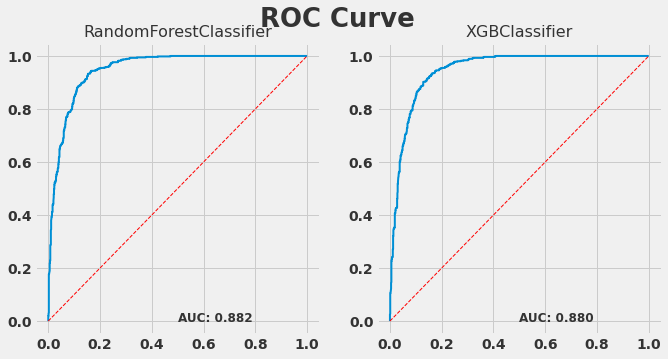

In [50]:
# Draw Roc Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("ROC Curve", fontsize=26, weight='bold')

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("RandomForestClassifier", fontsize=16)
draw_roc_curve(rfc_fpr, rfc_tpr, rfc_auc, ax1)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("XGBClassifier", fontsize=16)
draw_roc_curve(xgbc_fpr, xgbc_tpr, xgbc_auc, ax2); 

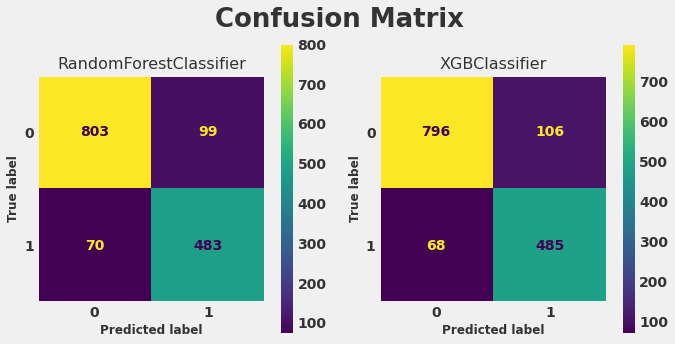

In [51]:
# Draw Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Confusion Matrix", fontsize=26, weight='bold')

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("RandomForestClassifier", fontsize=16)
ConfusionMatrixDisplay(rfc_cm).plot(ax=ax1)
ax1.grid(False)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("XGBClassifier", fontsize=16)
ConfusionMatrixDisplay(xgbc_cm).plot(ax=ax2)
ax2.grid(False);

In [104]:
# Save models in pickle
import pickle

with open("rfc.pkl", "wb") as rfc_file:
    pickle.dump(rfc_model, rfc_file)

with open("xgbc.pkl", "wb") as xgbc_file:
    pickle.dump(xgbc_model, xgbc_file)

## **Conclusion**
* Optimized RandomForestClassifier with the hyperparameters {'n_estimators': 150, 'max_features': 0.8, 'max_depth': 8, 'criterion': 'gini'} showed the highest performance 
* In the best model,'Q12': "The course helped me look at life and the world with a new perspective" has the highet feature importance value

## **Further Considerations**
* As an additional research, feature selection and feature extraction should be considered
* Here we created a new feature as a target variable by combining two existing columns. It could be an option that use a clustering algorithm to create labels, and then create a classification model.
* Other models such as a Neural Network should be tested